In [85]:
kuster_evidence_file = "../../test_data/system_tests/kuster_tissue_data/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
kuster_iqnormed_evidence_file = "../../test_data/system_tests/kuster_tissue_data/evidence.iqnormed.txt"
figure_name = "../../test_data/system_tests/kuster_tissue_data/normalization_plots.pdf"

In [91]:
import numpy as np
import directlfq.benchmarking as lfq_benchmark

class NormalizationVisualization():
    def __init__(self, ion_dataframe, title, ax, cumulative = False, histtype = 'step', density = True, bins = 150):
        self._prepared_dataframe = DataframePreparerNormalizationPlot(ion_dataframe)
        self._ax = ax
        self._title = title
        self._histconfig = lfq_benchmark.HistPlotConfig(cumulative, histtype, density, bins)
        self._plot_shift_histogram()
    
    def _plot_shift_histogram(self):
        for column in self._prepared_dataframe.reference_normalized_dataframe.columns:
            fcs_to_reference = self._prepared_dataframe.reference_normalized_dataframe[column]
            self._ax.hist(fcs_to_reference, cumulative = self._histconfig.cumulative, histtype = self._histconfig.histtype, density = self._histconfig.density, bins = self._histconfig.bins)
        self._ax.set_xlabel("log2FC to reference sample")
        self._ax.set_title(self._title)

class DataframePreparerNormalizationPlot():
    def __init__(self, ion_dataframe):
        self._ion_dataframe = ion_dataframe
        self.reference_column = None
        self.reference_normalized_dataframe = None
        self._define_reference_normalized_dataframe()

    def _define_reference_normalized_dataframe(self):
        self._select_one_column_with_most_valid_values_as_reference()
        self._subtract_reference_from_ion_dataframe()
    
    def _select_one_column_with_most_valid_values_as_reference(self):
        sorted_columnnames = sorted(self._ion_dataframe.columns, key=lambda x : self._get_num_valid_values(x), reverse=True)
        self.reference_column = sorted_columnnames[1]
    
    def _get_num_valid_values(self, column_name):
        values = self._ion_dataframe[column_name].to_numpy()
        
        return sum(~np.isnan(values))

    def _subtract_reference_from_ion_dataframe(self):
        self.reference_normalized_dataframe = self._ion_dataframe.subtract(self._ion_dataframe[self.reference_column], axis = 0)
        self.reference_normalized_dataframe = self.reference_normalized_dataframe.drop(labels = self.reference_column, axis = 1)




In [73]:
import directlfq.utils as lfq_utils

peptide_df = lfq_utils.import_data(kuster_evidence_file, input_type_to_use="maxquant_evidence_benchmark")
peptide_df = lfq_utils.index_and_log_transform_input_df(peptide_df)
peptide_df = lfq_utils.remove_allnan_rows_input_df(peptide_df)

In [75]:
import directlfq.utils as lfq_utils

peptide_df_iqnorm = lfq_utils.import_data(kuster_iqnormed_evidence_file, input_type_to_use="maxquant_evidence_benchmark_iqnormed")
peptide_df_iqnorm = lfq_utils.index_and_log_transform_input_df(peptide_df_iqnorm)
peptide_df_iqnorm = lfq_utils.remove_allnan_rows_input_df(peptide_df_iqnorm)

/Users/constantin/workspace/directlfq/directlfq/utils.py:696: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/constantin/workspace/directlfq/directlfq/configs/intable_config.yaml' mode='r' encoding='UTF-8'>
  config_dict = load_config(INTABLE_CONFIG)


using input type maxquant_evidence_benchmark_iqnormed


In [76]:
import directlfq.normalization as lfq_norm

norm_mgr = lfq_norm.NormalizationManagerSamples(peptide_df.copy(), num_samples_quadratic=50)
norm_mgr.complete_dataframe

to few values for normalization without missing values. Including missing values


P010693  P010694  P010695  \
protein ion                                                            
0       _ILELEKQKEEAQR_4                       NaN      NaN      NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN      NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN      NaN      NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN      NaN   
10      _CLAWSSEQAK_2                          NaN      NaN      NaN   
...                                            ...      ...      ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4      25.199866      NaN      NaN   
        _TQPVREPSAPK_2                   24.467568      NaN      NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN      NaN   
        _ITTPYMTK_2                            NaN      NaN      NaN   
99;98   _LTPETLTR_2                            NaN      NaN      NaN   

                                           P010738  P010739  P010740  P013127  \
protein ion                                                                     
0       _ILELEKQKEEAQR_4                       NaN      NaN      NaN      NaN   
1       _VDFSLSSDRDFILLNVPIPQEQAR_3            NaN      NaN      NaN      NaN   
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7  20.473544      NaN      NaN      NaN   
        _VQQPACREPFLSCCQFAESLR_3               NaN      NaN      NaN      NaN   
10      _CLAWSSEQAK_2                          NaN      NaN      NaN      NaN   
...                                            ...      ...      ...      ...   
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN      NaN      NaN      NaN   
        _TQPVREPSAPK_2                         NaN      NaN      NaN      NaN   
9999    _ITTPYM(ox)TKYER_3                     NaN      NaN      NaN      NaN   
        _ITTPYMTK_2                            NaN      NaN      NaN      NaN   
99;98   _LTPETLTR_2                            NaN      NaN      NaN      NaN   

                                           P018020    P018021  
protein ion                                                    
0       _ILELEKQKEEAQR_4                 22.103448  22.399226  
1       _VDFSLSSDRDFILLNVPIPQEQAR_3      20.613401        NaN  
        _VGETLNLNLRAVGISGSFSYFYYMIVSR_7        NaN        NaN  
        _VQQPACREPFLSCCQFAESLR_3         24.691863        NaN  
10      _CLAWSSEQAK_2                    25.221045        NaN  
...                                            ...        ...  
9998    _TQPVREPSAPKLEGQMGEDGNSIK_4            NaN        NaN  
        _TQPVREPSAPK_2                         NaN        NaN  
9999    _ITTPYM(ox)TKYER_3               25.936332        NaN  
        _ITTPYMTK_2                            NaN  23.693457  
99;98   _LTPETLTR_2                      27.422272        NaN  

[286726 rows x 9 columns]

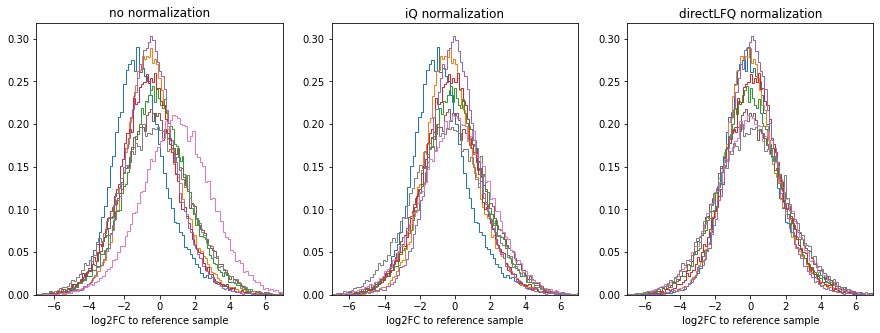

In [94]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1, ncols=3, figsize = (15, 5))

NormalizationVisualization(peptide_df, title="no normalization",ax=axes[0])

NormalizationVisualization(peptide_df_iqnorm, title= "iQ normalization",ax=axes[1])

NormalizationVisualization(norm_mgr.complete_dataframe, "directLFQ normalization",ax=axes[2])



axes[0].set_xlim(-7, 7)
axes[1].set_xlim(-7, 7)
axes[2].set_xlim(-7, 7)



fig.savefig(figure_name)

### Learning Tests

In [33]:
import seaborn as sns

def test_subtracting_from_df():
    iris = sns.load_dataset('iris')
    display(iris)
    iris = iris.set_index("species")

    iris2 = iris.subtract(iris["petal_width"], axis=0)
    display(iris2)
    assert np.allclose([0], iris2["petal_width"])

test_subtracting_from_df()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.9,3.3,1.2,0.0
setosa,4.7,2.8,1.2,0.0
setosa,4.5,3.0,1.1,0.0
setosa,4.4,2.9,1.3,0.0
setosa,4.8,3.4,1.2,0.0
...,...,...,...,...
virginica,4.4,0.7,2.9,0.0
virginica,4.4,0.6,3.1,0.0
virginica,4.5,1.0,3.2,0.0
